In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import sys
# Set sys path
sys.path.append(str(Path(os.getcwd()).parent))

In [3]:
# Adjust matplotlib settings for font inclusion
plt.rcParams['pdf.fonttype'] = 42  # Use Type 3 (PostScript) fonts
plt.rcParams['ps.fonttype'] = 42

# Set filpaths for data and figures
notebook_dir = os.getcwd()
file_path = Path(notebook_dir).parent / 'data' 

# Load data

In [4]:
df = pd.read_excel(file_path / 'Xue_tableS4.xlsx', sheet_name='A')
df = df.set_index('Sample_ID')

In [5]:
d_cat = df.iloc[:,-1:]

In [6]:
d_prot = df.iloc[:,:-1]

In [7]:
dv = pd.read_excel(file_path / 'Xue_tableS4.xlsx', sheet_name='B')
dv = dv.set_index('Sample_ID')

In [8]:
d_cat_val = dv.iloc[:,-1:]

In [9]:
d_prot_val = dv.iloc[:,:-1]

# RF + XGBoost classifier

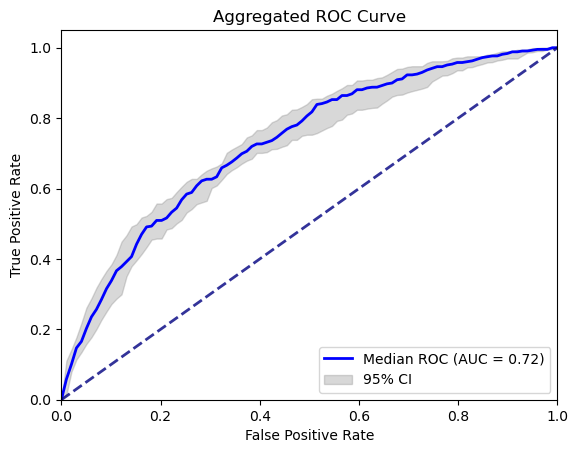

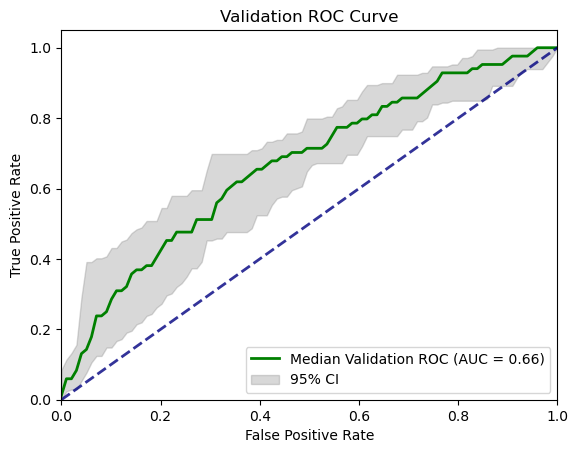

In [10]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(d_prot, d_cat[['label']], between='label')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot(0, 1, n_runs=10, n_estimators=50)
baseline.validate_and_plot(d_prot_val, d_cat_val[['label']], 0, 1)

In [11]:
baseline.save_plots_to_pdf(file_path / 'Xue_RF_XGB.pdf')

Plots saved to d:\Notebooks\ADAPT-MS\data\Xue_RF_XGB.pdf.


# ADAPT-MS: t-test feature selection LR refitting per sample

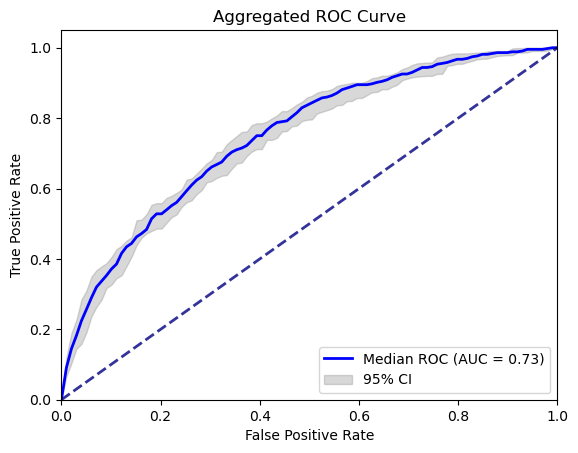

242it [00:14, 16.24it/s]


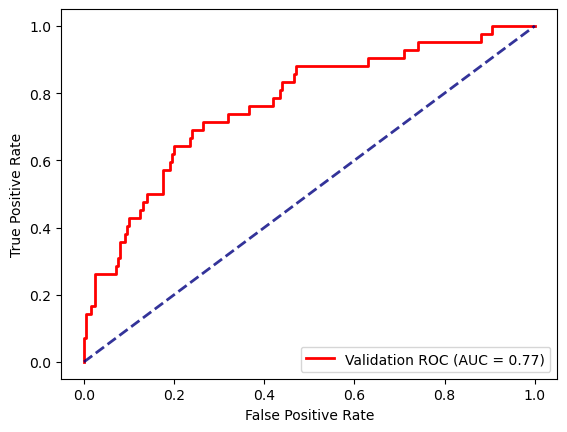

In [12]:
from utils.AdaptmsClassifier import AdaptmsClassifierDF
#Initialize the classifier
adaptms = AdaptmsClassifierDF(d_prot, d_cat, between='label')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot(0, 1, n_runs=10, topn_features=20)

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_dataframe(d_prot_val, d_cat_val)
adaptms.plot_validation_roc(0, 1)

In [13]:
adaptms.selected_features

{'B4DU55_ZNF879',
 'O14791_APOL1',
 'P00740_F9',
 'P01009_SERPINA1',
 'P01019_AGT',
 'P01023_A2M',
 'P01024_C3',
 'P02647_APOA1',
 'P02655_APOC2',
 'P02656_APOC3',
 'P02743_APCS',
 'P04003_C4BPA',
 'P04004_VTN',
 'P04114_APOB',
 'P04278_SHBG',
 'P04406_GAPDH',
 'P05090_APOD',
 'P05156_CFI',
 'P05546_SERPIND1',
 'P06396_GSN',
 'P08603_CFH',
 'P18428_LBP',
 'P36955_SERPINF1',
 'P43652_AFM',
 'Q13129_RLF',
 'Q13330_MTA1',
 'Q13790_APOF',
 'Q460N5_PARP14',
 'Q58DX5_NAALADL2',
 'Q5QJ38_TCHHL1',
 'Q5U651_RASIP1',
 'Q76N89_HECW1',
 'Q92185_ST8SIA1',
 'Q99684_GFI1',
 'Q9NQX4_MYO5C',
 'age'}

In [14]:
adaptms.save_plots_to_pdf(file_path / 'ADAPT-MS_Xue_applied.pdf')

Plots saved to d:\Notebooks\ADAPT-MS\data\ADAPT-MS_Xue_applied.pdf.
